In [31]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum, auto

In [32]:
img_path = 'sample_image.png'
image = Image.open(img_path)
image.size

(512, 704)

In [13]:
img_array = np.array(image)
img_array.shape

(704, 512, 3)

In [33]:
class EffectType(Enum):
    BRIGHTNESS = auto()
    GRAYSCALE = auto()
    NEGATIVE = auto()
    SEPIA = auto()

class GradientType(Enum):
    DIAGONAL = auto()
    FROM_CENTER = auto()
    TO_CENTER = auto()

In [38]:
def apply_gradient_correction(img, effect_type: EffectType, gradient_type: GradientType):
    rows, cols, _ = img.shape
    gradient = np.zeros((rows, cols))
    
    if gradient_type == GradientType.DIAGONAL:
        for i in range(rows):
            for j in range(cols):
                gradient[i, j] = (i + j) / (rows + cols)
                
    elif gradient_type == GradientType.FROM_CENTER:
        center_i, center_j = rows // 2, cols // 2
        for i in range(rows):
            for j in range(cols):
                distance = np.sqrt((center_i - i) ** 2 + (center_j - j) ** 2)
                max_dist = np.sqrt(center_i ** 2 + center_j ** 2)
                gradient[i, j] = 1 - (distance / max_dist)
                
    elif gradient_type == GradientType.TO_CENTER:
        center_i, center_j = rows // 2, cols // 2
        for i in range(rows):
            for j in range(cols):
                distance = np.sqrt((center_i - i) ** 2 + (center_j - j) ** 2)
                max_dist = np.sqrt(center_i ** 2 + center_j ** 2)
                gradient[i, j] = (distance / max_dist)
    
    gradient = np.repeat(gradient[:, :, np.newaxis], 3, axis=2)
    
    corrected_img = None
    if effect_type == EffectType.BRIGHTNESS:
        corrected_img = np.clip(img * (1 + gradient), 0, 255)
    elif effect_type == EffectType.GRAYSCALE:
        gray_img = img.mean(axis=2)
        corrected_img = np.repeat(gray_img[:, :, np.newaxis], 3, axis=2)
    elif effect_type == EffectType.NEGATIVE:
        corrected_img = 255 - img
    elif effect_type == EffectType.SEPIA:
        sepia_filter = np.array([[0.393, 0.769, 0.189],
                                 [0.349, 0.686, 0.168],
                                 [0.272, 0.534, 0.131]])
        sepia_img = img.dot(sepia_filter.T)
        corrected_img = np.clip(sepia_img, 0, 255)
        
    if corrected_img is not None:
        corrected_img = img * (1 - gradient) + corrected_img * gradient
        return np.clip(corrected_img, 0, 255).astype(np.uint8)
    else:
        raise ValueError("Effect type not recognized or not implemented.")


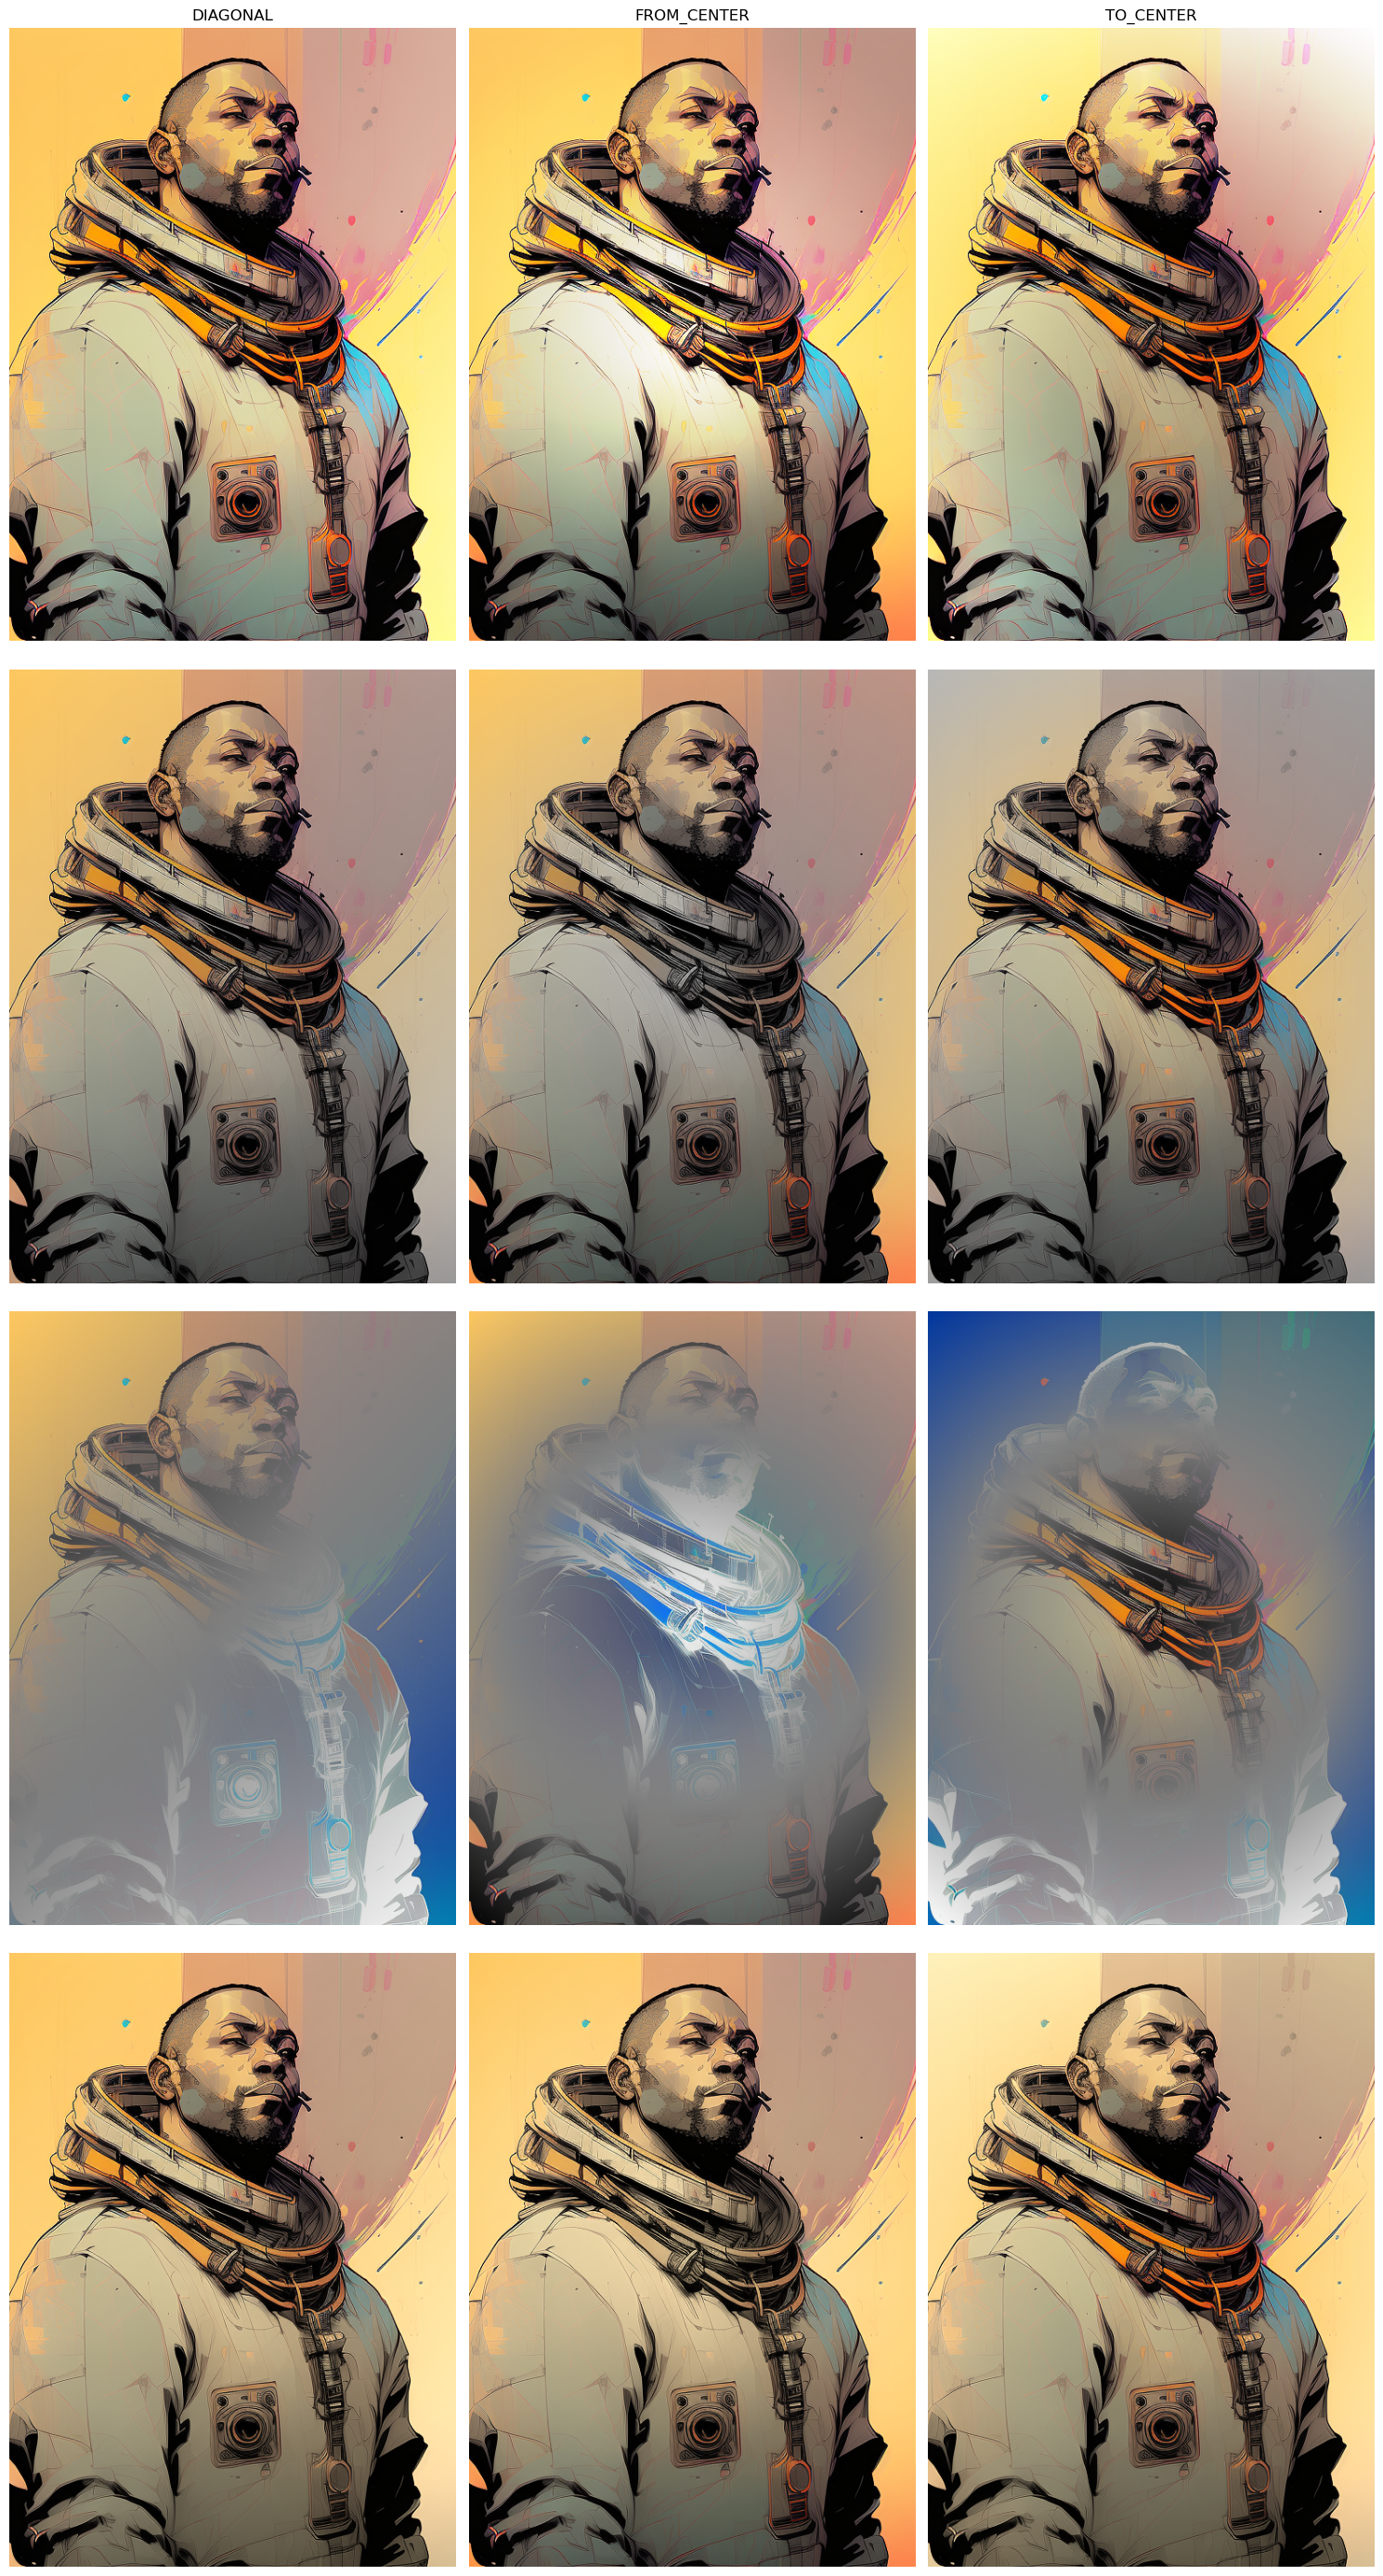

In [49]:
fig, axs = plt.subplots(len(EffectType), len(GradientType), figsize=(15, 28))  


for i, effect in enumerate(EffectType):
    for j, gradient in enumerate(GradientType):
        mod_image = apply_gradient_correction(img_array, effect, gradient)
        
        axs[i, j].imshow(mod_image)
        axs[i, j].axis('off') 
        if j == 0:
            axs[i, j].set_ylabel(effect.name, size='large')
        if i == 0:
            axs[i, j].set_title(gradient.name, size='large')

plt.tight_layout()
plt.show()
